In [136]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
%matplotlib inline

# 改变颜色空间

## 改变颜色空间

In [2]:
flags = [i for i in dir(cv) if i.startswith('COLOR_')]
print( flags )

['COLOR_BAYER_BG2BGR', 'COLOR_BAYER_BG2BGRA', 'COLOR_BAYER_BG2BGR_EA', 'COLOR_BAYER_BG2BGR_VNG', 'COLOR_BAYER_BG2GRAY', 'COLOR_BAYER_BG2RGB', 'COLOR_BAYER_BG2RGBA', 'COLOR_BAYER_BG2RGB_EA', 'COLOR_BAYER_BG2RGB_VNG', 'COLOR_BAYER_BGGR2BGR', 'COLOR_BAYER_BGGR2BGRA', 'COLOR_BAYER_BGGR2BGR_EA', 'COLOR_BAYER_BGGR2BGR_VNG', 'COLOR_BAYER_BGGR2GRAY', 'COLOR_BAYER_BGGR2RGB', 'COLOR_BAYER_BGGR2RGBA', 'COLOR_BAYER_BGGR2RGB_EA', 'COLOR_BAYER_BGGR2RGB_VNG', 'COLOR_BAYER_GB2BGR', 'COLOR_BAYER_GB2BGRA', 'COLOR_BAYER_GB2BGR_EA', 'COLOR_BAYER_GB2BGR_VNG', 'COLOR_BAYER_GB2GRAY', 'COLOR_BAYER_GB2RGB', 'COLOR_BAYER_GB2RGBA', 'COLOR_BAYER_GB2RGB_EA', 'COLOR_BAYER_GB2RGB_VNG', 'COLOR_BAYER_GBRG2BGR', 'COLOR_BAYER_GBRG2BGRA', 'COLOR_BAYER_GBRG2BGR_EA', 'COLOR_BAYER_GBRG2BGR_VNG', 'COLOR_BAYER_GBRG2GRAY', 'COLOR_BAYER_GBRG2RGB', 'COLOR_BAYER_GBRG2RGBA', 'COLOR_BAYER_GBRG2RGB_EA', 'COLOR_BAYER_GBRG2RGB_VNG', 'COLOR_BAYER_GR2BGR', 'COLOR_BAYER_GR2BGRA', 'COLOR_BAYER_GR2BGR_EA', 'COLOR_BAYER_GR2BGR_VNG', 'COLOR_

## 对象追踪

In [3]:
cap = cv.VideoCapture(0)
while(1):
    # 读取帧
    _, frame = cap.read()
    # 转换颜色空间 BGR 到 HSV
    hsv = cv.cvtColor(frame, cv.COLOR_BGR2HSV)
    # 定义HSV中蓝色的范围
    lower_blue = np.array([110,50,50])
    upper_blue = np.array([130,255,255])
    # 设置HSV的阈值使得只取蓝色
    mask = cv.inRange(hsv, lower_blue, upper_blue)
    # 将掩膜和图像逐像素相加
    res = cv.bitwise_and(frame,frame, mask= mask)
    cv.imshow('frame',frame)
    cv.imshow('mask',mask)
    cv.imshow('res',res)
    k = cv.waitKey(5) & 0xFF
    if k == 27:
        break
cv.destroyAllWindows()

## 找到追踪的HSV值

In [43]:
green = np.uint8([[[0,255,0 ]]])
hsv_green = cv.cvtColor(green,cv.COLOR_BGR2HSV)
print( hsv_green )

[[[ 60 255 255]]]


# 图像的几何变换

## 缩放

In [44]:
img = cv.imread('messi.jpg')
res = cv.resize(img,None,fx=2, fy=2, interpolation = cv.INTER_CUBIC)
#或者
height, width = img.shape[:2]
res = cv.resize(img,(2*width, 2*height), interpolation = cv.INTER_CUBIC)

## 平移

In [47]:
img = cv.imread('messi.jpg',0)
rows,cols = img.shape
M = np.float32([[1,0,100],[0,1,50]])
dst = cv.warpAffine(img,M,(cols,rows))
cv.imshow('img',dst)
cv.waitKey(0)
cv.destroyAllWindows()

## 旋转

In [55]:
img = cv.imread('messi.jpg',0)
rows,cols = img.shape
# cols-1 和 rows-1 是坐标限制
M = cv.getRotationMatrix2D(((cols-1)/2.0,(rows-1)/2.0),90,1)
dst = cv.warpAffine(img,M,(cols,rows))

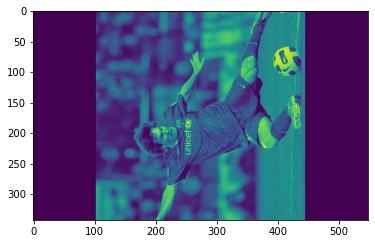

In [57]:
plt.imshow(dst)

## 仿射变换

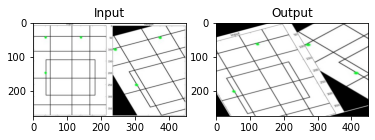

In [60]:
img = cv.imread('drawing.jpg')
rows,cols,ch = img.shape
pts1 = np.float32([[50,50],[200,50],[50,200]])
pts2 = np.float32([[10,100],[200,50],[100,250]])
M = cv.getAffineTransform(pts1,pts2)
dst = cv.warpAffine(img,M,(cols,rows))
plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

## 透视变换

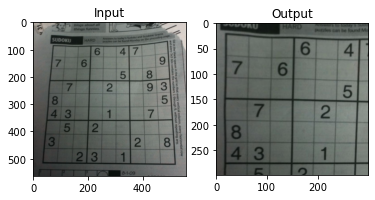

In [62]:
img = cv.imread('sudoku.png')
rows,cols,ch = img.shape
pts1 = np.float32([[56,65],[368,52],[28,387],[389,390]])
pts2 = np.float32([[0,0],[300,0],[0,300],[300,300]])
M = cv.getPerspectiveTransform(pts1,pts2)
dst = cv.warpPerspective(img,M,(300,300))
plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()

# 图像阈值

## 简单阈值

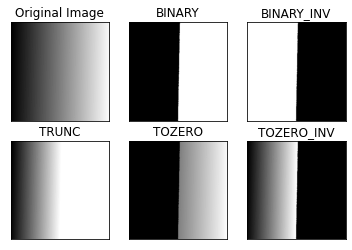

In [64]:
img = cv.imread('gradient.png',0)
ret,thresh1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
ret,thresh2 = cv.threshold(img,127,255,cv.THRESH_BINARY_INV)
ret,thresh3 = cv.threshold(img,127,255,cv.THRESH_TRUNC)
ret,thresh4 = cv.threshold(img,127,255,cv.THRESH_TOZERO)
ret,thresh5 = cv.threshold(img,127,255,cv.THRESH_TOZERO_INV)
titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

## Otsu的二值化

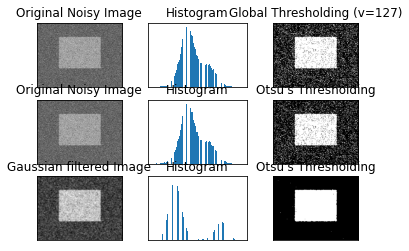

In [67]:
img = cv.imread('noisy.jpg',0)
# 全局阈值
ret1,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
# Otsu阈值
ret2,th2 = cv.threshold(img,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
# 高斯滤波后再采用Otsu阈值
blur = cv.GaussianBlur(img,(5,5),0)
ret3,th3 = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
# 绘制所有图像及其直方图
images = [img, 0, th1,
          img, 0, th2,
          blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
          'Original Noisy Image','Histogram',"Otsu's Thresholding",
          'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]
for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()

In [68]:
img = cv.imread('noisy.jpg',0)
blur = cv.GaussianBlur(img,(5,5),0)
# 寻找归一化直方图和对应的累积分布函数
hist = cv.calcHist([blur],[0],None,[256],[0,256])
hist_norm = hist.ravel()/hist.max()
Q = hist_norm.cumsum()
bins = np.arange(256)
fn_min = np.inf
thresh = -1
for i in range(1,256):
    p1,p2 = np.hsplit(hist_norm,[i]) # 概率
    q1,q2 = Q[i],Q[255]-Q[i] # 对类求和
    b1,b2 = np.hsplit(bins,[i]) # 权重
    # 寻找均值和方差
    m1,m2 = np.sum(p1*b1)/q1, np.sum(p2*b2)/q2
    v1,v2 = np.sum(((b1-m1)**2)*p1)/q1,np.sum(((b2-m2)**2)*p2)/q2
    # 计算最小化函数
    fn = v1*q1 + v2*q2
    if fn < fn_min:
        fn_min = fn
        thresh = i
# 使用OpenCV函数找到otsu的阈值
ret, otsu = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
print( "{} {}".format(thresh,ret) )

133 132.0


<ipython-input-68-5fcd81c9d4a0>:15: RuntimeWarning: invalid value encountered in double_scalars
  m1,m2 = np.sum(p1*b1)/q1, np.sum(p2*b2)/q2
<ipython-input-68-5fcd81c9d4a0>:15: RuntimeWarning: divide by zero encountered in double_scalars
  m1,m2 = np.sum(p1*b1)/q1, np.sum(p2*b2)/q2
<ipython-input-68-5fcd81c9d4a0>:16: RuntimeWarning: invalid value encountered in multiply
  v1,v2 = np.sum(((b1-m1)**2)*p1)/q1,np.sum(((b2-m2)**2)*p2)/q2


# 图像平滑

## 2D卷积（图像过滤）

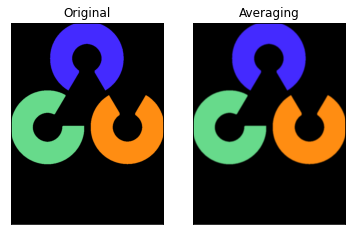

In [80]:
img = cv.imread('opencv-logo.png')
kernel = np.ones((5,5),np.float32)/25
dst = cv.filter2D(img,-1,kernel)
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst),plt.title('Averaging')
plt.xticks([]), plt.yticks([])
plt.show()

## 图像模糊（图像平滑）

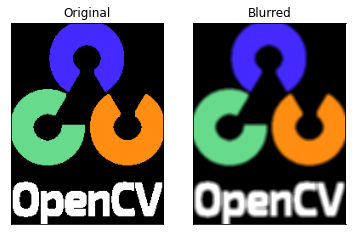

In [90]:
img = cv.imread('opencv-logo-white.png')

# 平均

blur = cv.blur(img,(5,5))
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

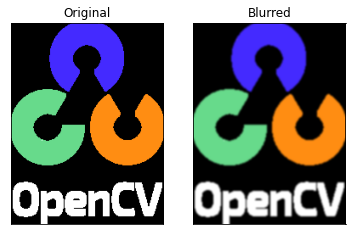

In [89]:
# 高斯模糊

blur = cv.GaussianBlur(img,(5,5),0)

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

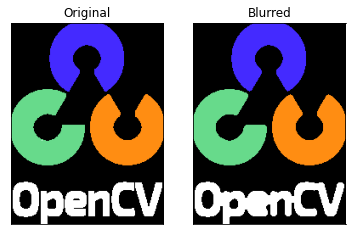

In [88]:
## 中位模糊

median = cv.medianBlur(img,5)

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(median),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

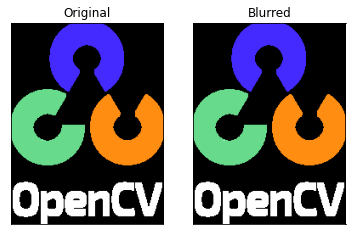

In [87]:
# 双边滤波

blur = cv.bilateralFilter(img,9,75,75)

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()

# 形态学转换

## 侵蚀

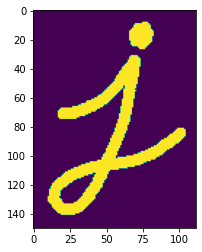

In [93]:
img = cv.imread('j.png',0)
plt.imshow(img)

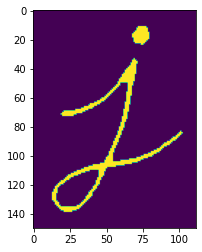

In [94]:
kernel = np.ones((5,5),np.uint8)
erosion = cv.erode(img,kernel,iterations = 1)
plt.imshow(erosion)

## 扩张

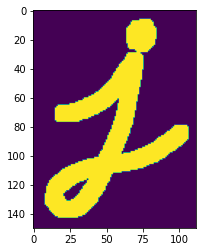

In [95]:
dilation = cv.dilate(img,kernel,iterations = 1) 
plt.imshow(dilation)

## 开运算

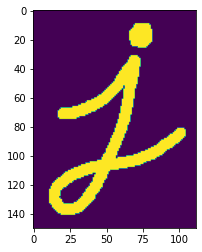

In [96]:
# 侵蚀然后扩张

opening = cv.morphologyEx(img, cv.MORPH_OPEN, kernel) 
plt.imshow(opening)

## 闭运算

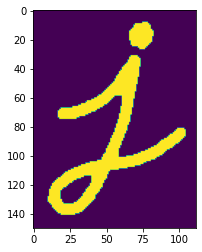

In [97]:
# 先扩张然后再侵蚀

closing = cv.morphologyEx(img, cv.MORPH_CLOSE, kernel) 
plt.imshow(closing)

## 形态学梯度

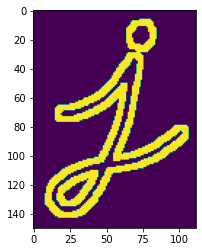

In [98]:
gradient = cv.morphologyEx(img, cv.MORPH_GRADIENT, kernel) 
plt.imshow(gradient)

## 顶帽

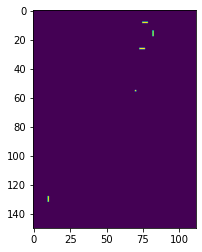

In [100]:
# 输入图像和图像开运算之差

tophat = cv.morphologyEx(img, cv.MORPH_TOPHAT, kernel) 
plt.imshow(tophat)

## 黑帽

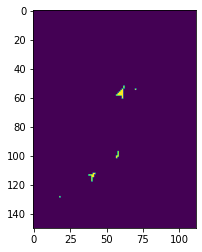

In [101]:
# 输入图像和图像闭运算之差

blackhat = cv.morphologyEx(img, cv.MORPH_BLACKHAT, kernel) 
plt.imshow(blackhat)

## 结构元素

In [102]:
# 矩形内核
cv.getStructuringElement(cv.MORPH_RECT,(5,5))

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=uint8)

In [103]:
# 椭圆内核
cv.getStructuringElement(cv.MORPH_ELLIPSE,(5,5))

array([[0, 0, 1, 0, 0],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [0, 0, 1, 0, 0]], dtype=uint8)

In [104]:
# 十字内核
cv.getStructuringElement(cv.MORPH_CROSS,(5,5))

array([[0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [1, 1, 1, 1, 1],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0]], dtype=uint8)

# 图像梯度

## Sobel Scharr Laplacian 算子

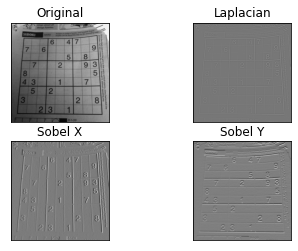

In [107]:
# 梯度滤波器或高通滤波器

img = cv.imread('sudoku.png',0)
laplacian = cv.Laplacian(img,cv.CV_64F)
sobelx = cv.Sobel(img,cv.CV_64F,1,0,ksize=5)
sobely = cv.Sobel(img,cv.CV_64F,0,1,ksize=5)
plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])
plt.show()

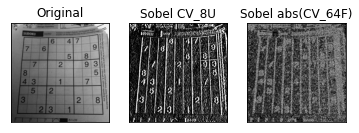

In [106]:
img = cv.imread('sudoku.png',0)
# Output dtype = cv.CV_8U
sobelx8u = cv.Sobel(img,cv.CV_8U,1,0,ksize=5)
# Output dtype = cv.CV_64F. Then take its absolute and convert to cv.CV_8U
sobelx64f = cv.Sobel(img,cv.CV_64F,1,0,ksize=5)
abs_sobel64f = np.absolute(sobelx64f)
sobel_8u = np.uint8(abs_sobel64f)
plt.subplot(1,3,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(sobelx8u,cmap = 'gray')
plt.title('Sobel CV_8U'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(sobel_8u,cmap = 'gray')
plt.title('Sobel abs(CV_64F)'), plt.xticks([]), plt.yticks([])
plt.show()

# Canny边缘检测

Canny Edge Detection \
查找图像的强度梯度
1. 非极大值抑制
2. 磁滞阈值 

L2 gradient \
$$ Edge\_Gradient \; (G) = \sqrt{G_x^2 + G_y^2} \\ Angle \; (\theta) = \tan^{-1} \bigg(\frac{G_y}{G_x}\bigg) $$ 

L1 gradient\
$$ Edge\_Gradient \; (G) = |G_x| + |G_y| $$

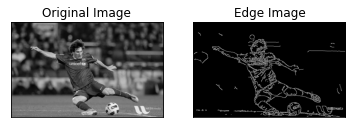

In [108]:
img = cv.imread('messi.jpg',0)
edges = cv.Canny(img,100,200)
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

# 图像金字塔

## 理论

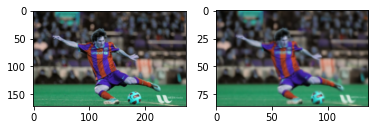

In [115]:
# 高斯金字塔 拉普拉斯金字塔

img = cv.imread('messi.jpg') 
higher_reso = cv.pyrDown(img)
lower_reso = cv.pyrDown(higher_reso)
plt.subplot(1,2,1), plt.imshow(higher_reso)
plt.subplot(1,2,2), plt.imshow(lower_reso)
plt.show()

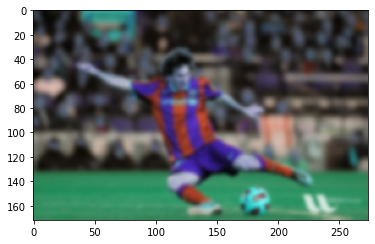

In [117]:
higher_reso2 = cv.pyrUp(lower_reso) 
plt.imshow(higher_reso2)

## 使用金字塔进行图像融合

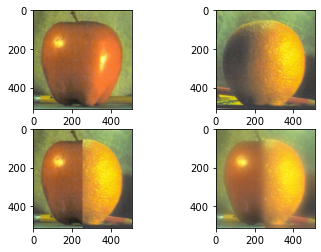

In [150]:
A = cv.imread('apple.jpg')[:,:,::-1]
B = cv.imread('orange.jpg')[:,:,::-1]
# 生成A的高斯金字塔
G = A.copy()
gpA = [G]
for i in range(6):
    G = cv.pyrDown(G)
    gpA.append(G)
# 生成B的高斯金字塔
G = B.copy()
gpB = [G]
for i in range(6):
    G = cv.pyrDown(G)
    gpB.append(G)
# 生成A的拉普拉斯金字塔
lpA = [gpA[5]]
for i in range(5,0,-1):
    GE = cv.pyrUp(gpA[i])
    L = cv.subtract(gpA[i-1],GE)
    lpA.append(L)
# 生成B的拉普拉斯金字塔
lpB = [gpB[5]]
for i in range(5,0,-1):
    GE = cv.pyrUp(gpB[i])
    L = cv.subtract(gpB[i-1],GE)
    lpB.append(L)
# 现在在每个级别中添加左右两半图像 
LS = []
for la,lb in zip(lpA,lpB):
    rows,cols,dpt = la.shape
    ls = np.hstack((la[:,0:cols//2], lb[:,cols//2:]))
    LS.append(ls)
# 现在重建
ls_ = LS[0]
for i in range(1,6):
    ls_ = cv.pyrUp(ls_)
    ls_ = cv.add(ls_, LS[i])
# 图像与直接连接的每一半
real = np.hstack((A[:,:cols//2],B[:,cols//2:]))
# cv.imwrite('Pyramid_blending2.jpg',ls_)
# cv.imwrite('Direct_blending.jpg',real)
plt.subplot(2,2,1), plt.imshow(A)
plt.subplot(2,2,2), plt.imshow(B)
plt.subplot(2,2,3), plt.imshow(real)
plt.subplot(2,2,4), plt.imshow(ls_)
plt.show()

# 轮廓

## 轮廓入门

In [173]:
#轮廓定义: 轮廓可以简单地解释为连接具有相同颜色或强度的所有连续点（沿边界）的曲线。轮廓是用于形状分析以及对象检测和识别的有用工具。

im = cv.imread('messi.jpg')
imgray = cv.cvtColor(im, cv.COLOR_BGR2GRAY)
ret, thresh = cv.threshold(imgray, 127, 255, 0)
contours, hierarchy = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

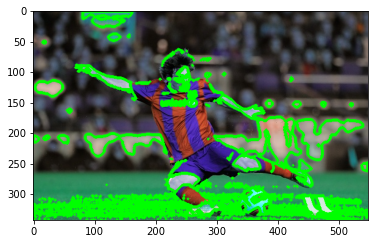

In [174]:
# 绘制轮廓
ct = cv.drawContours(img, contours, -1, (0,255,0), 3)

plt.imshow(ct)

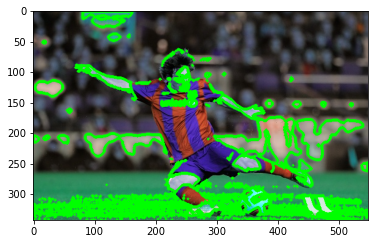

In [170]:
#绘制单个轮廓，如第四个轮廓：
ct = cv.drawContours(img, contours, 3, (0,255,0), 3) 

plt.imshow(ct)

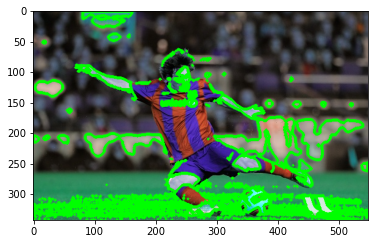

In [172]:
cnt = contours[4]
ct = cv.drawContours(img, [cnt], 0, (0,255,0), 3)

plt.imshow(ct)

## 轮廓特征

## 特征矩

In [242]:
# 特征矩

img = cv.imread('star.jpeg',0)
ret,thresh = cv.threshold(img,127,255,0)
contours,hierarchy = cv.findContours(thresh, 1, 2)
cnt = contours[0]
M = cv.moments(cnt)
print( M )

{'m00': 4721.5, 'm10': 656614.0, 'm01': 657186.5, 'm20': 94645010.75, 'm11': 94295792.375, 'm02': 95336147.58333333, 'm30': 14099144621.5, 'm21': 14012857731.033333, 'm12': 14108872938.5, 'm03': 14381130034.35, 'mu20': 3330397.8100444824, 'mu11': 2901562.4669199437, 'mu02': 3862231.289306, 'mu30': 10653518.272298813, 'mu21': 32165910.09438902, 'mu12': 42837870.48860681, 'mu03': 36103733.345386505, 'nu20': 0.14939502120463885, 'nu11': 0.13015832071613676, 'nu02': 0.17325201320480776, 'nu30': 0.006954934912772728, 'nu21': 0.02099886679673404, 'nu12': 0.027965841277499383, 'nu03': 0.02356959542446849}


In [201]:
cx = int(M['m10']/M['m00'])
cy = int(M['m01']/M['m00'])

In [202]:
# 轮廓面积

area = cv.contourArea(cnt) 

In [203]:
# 轮廓周长

perimeter = cv.arcLength(cnt,True)

In [204]:
# 轮廓近似

epsilon = 0.1*cv.arcLength(cnt,True) 
approx = cv.approxPolyDP(cnt,epsilon,True)

In [205]:
# 轮廓凸包

# hull = cv.convexHull(points[, hull[, clockwise[, returnPoints]] 

hull = cv.convexHull(cnt) 

In [206]:
# 检查凸度

k = cv.isContourConvex(cnt) 

In [239]:
# 边界矩形

# 直角矩形
x,y,w,h = cv.boundingRect(cnt)
cv.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)

# 旋转矩形
rect = cv.minAreaRect(cnt)
box = cv.boxPoints(rect)
box = np.int0(box)
rec = cv.drawContours(img,[box],0,(0,0,255),2)

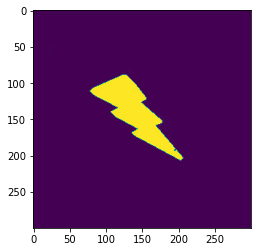

In [234]:
plt.imshow(rec)
plt.show()

In [209]:
# 最小闭合圈

(x,y),radius = cv.minEnclosingCircle(cnt)
center = (int(x),int(y))
radius = int(radius)
cir = cv.circle(img,center,radius,(0,255,0),2)

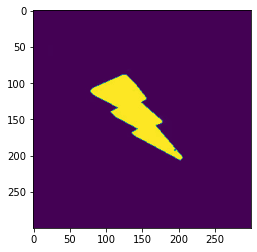

In [210]:
plt.imshow(cir)

In [212]:
# 拟合椭圆

ellipse = cv.fitEllipse(cnt)
elli = cv.ellipse(img,ellipse,(0,255,0),2)

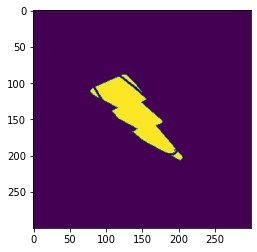

In [213]:
plt.imshow(elli)

In [214]:
# 拟合直线

rows,cols = img.shape[:2]
[vx,vy,x,y] = cv.fitLine(cnt, cv.DIST_L2,0,0.01,0.01)
lefty = int((-x*vy/vx) + y)
righty = int(((cols-x)*vy/vx)+y)
line = cv.line(img,(cols-1,righty),(0,lefty),(0,255,0),2)

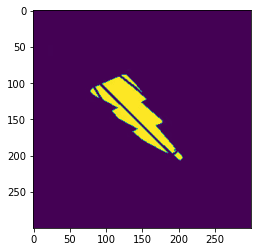

In [215]:
plt.imshow(line)

## 轮廓属性

In [245]:
# 长宽比 对象边界矩形的宽度与高度的比值

x,y,w,h = cv.boundingRect(cnt)
aspect_ratio = float(w)/h

In [246]:
#范围 轮廓区域与边界矩形区域的比值

area = cv.contourArea(cnt)
x,y,w,h = cv.boundingRect(cnt)
rect_area = w*h
extent = float(area)/rect_area

In [247]:
# 坚实度 等高线面积与其凸包面积之比

area = cv.contourArea(cnt)
hull = cv.convexHull(cnt)
hull_area = cv.contourArea(hull)
solidity = float(area)/hull_area

In [248]:
# 等效直径 面积与轮廓面积相同的圆的直径

area = cv.contourArea(cnt)
equi_diameter = np.sqrt(4*area/np.pi)

In [249]:
# 取向 物体指向的角度

(x,y),(MA,ma),angle = cv.fitEllipse(cnt)

In [250]:
# 掩码和像素点

mask = np.zeros(imgray.shape,np.uint8)
cv.drawContours(mask,[cnt],0,255,-1)
pixelpoints = np.transpose(np.nonzero(mask))
#pixelpoints = cv.findNonZero(mask)

In [251]:
# 最大值，最小值和它们的位置

min_val, max_val, min_loc, max_loc = cv.minMaxLoc(imgray,mask = mask)

In [252]:
# 平均颜色或平均强度

mean_val = cv.mean(im,mask = mask)

In [253]:
# 极端点

leftmost = tuple(cnt[cnt[:,:,0].argmin()][0])
rightmost = tuple(cnt[cnt[:,:,0].argmax()][0])
topmost = tuple(cnt[cnt[:,:,1].argmin()][0])
bottommost = tuple(cnt[cnt[:,:,1].argmax()][0])